# WeatherPy

What's the weather like as we approach the equator?

Using Python requests, APIs, and JSON traversals we generated 500+ random latitudes and longitudes with the Citypy Python library and the OpenWeatherMap API, with API keys to retrieve and graph scatter plots to showcase the following relationships:

Latitude vs. Temperature (F)
Latitude vs. Humidity (%)
Latitude vs. Cloudiness (%)
Latitude vs. Wind Speed (mph)
Latitude vs. Longitude (for fun and to see the distribution of the data)

## Analysis

Based off of a sample of 617 random cities in the world we attempted to find patterns using data vizualization. As expected temperatures apear to be higher around the equator as compared to further away. There also appears to be no relationship between latitude and humidity, cloudiness and wind speed. 


In [1]:
#Dependencies
import pandas as pd
import requests as req
import matplotlib.pyplot as plt
from citipy import citipy
from config import api_key
import random
import json
import numpy as np
import seaborn as sns

## Create List from Random Latitudes and Longitudes

In [2]:
#create lists
lat_long = []
citylist = []
country = []

# Create a set of random lat and lng combinations in large size to account for keyerrors later
lat = np.random.uniform(low=-90.000, high=90.000, size=1800)
lng = np.random.uniform(low=-180.000, high=180.000, size=1800)
lat_long = zip(lat, lng)

#loop through lat, lng to find nearest city with citipy
for lat,lng in lat_long:
    nearestcity = citipy.nearest_city(lat,lng)
    city = nearestcity.city_name
    citylist.append(city)
    country.append(nearestcity.country_code)


## Create DataFrame

In [3]:
#Create DataFrame for city and country
df = pd.DataFrame({'City': citylist,
              'Country': country})
#clean data of duplicates

df = df.drop_duplicates(subset=['City'],keep='first')
print(len(df))

727


In [4]:
#Create Columns for needed data
df['Latitude'] = ''
df['Longitude'] = ''
df['Temperature'] = ''
df['Humidity'] = ''
df['Cloudiness'] = ''
df['Wind Speed'] = ''

## API Call for Cities

In [5]:
#loop through cities, count and print the urls
count = 1
for index,row in df.iterrows():
    count +=1
    city_name = row['City']
    Country_id = row['Country']
    
    #api call for all Cities 
    api_url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,api_key)
    
    #url = target_url + city_name + ',' + country_code + '&units=' + units +'&mode= + '&APPID=' + api_key   
    
    country_info = req.get(api_url).json()
    
    #print all api url's for each city
    print(api_url)
    
    
    
    try:
        df.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df.set_value(index,'Temperature',country_info['list'][0]['main']['temp'])
        df.set_value(index,'Humidity',country_info['list'][0]['main']['humidity'])
        df.set_value(index,'Cloudiness',country_info['list'][0]['clouds']['all'])
        df.set_value(index,'Wind Speed',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df.set_value(index,'Latitude',np.nan)
        df.set_value(index,'Longitude',np.nan)
        df.set_value(index,'Temperature',np.nan)
        df.set_value(index,'Humidity',np.nan)
        df.set_value(index,'Cloudiness',np.nan)
        df.set_value(index,'Wind Speed',np.nan)

        
        print('Information Missing')
    print("------------------------")
    print(f"City # {count} : {row['City']}")
    print(f"This is the requested URL: {api_url}")



http://api.openweathermap.org/data/2.5/forecast?q=mercedes,ar&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 2 : mercedes
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=mercedes,ar&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 3 : punta arenas
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=novo oriente,br&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 4 : novo oriente
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=novo oriente,br&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http

http://api.openweathermap.org/data/2.5/forecast?q=atuona,pf&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 27 : atuona
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=atuona,pf&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=lagoa,pt&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 28 : lagoa
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=lagoa,pt&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 29 : busselton
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/forecast?q=vila franca do campo,pt&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 52 : vila franca do campo
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=vila franca do campo,pt&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=bilibino,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 53 : bilibino
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=bilibino,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=champerico,gt&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 54 : champerico
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=champerico,gt&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad

http://api.openweathermap.org/data/2.5/forecast?q=ngukurr,au&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
Information Missing
------------------------
City # 77 : ngukurr
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=ngukurr,au&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=rio grande,br&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 78 : rio grande
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=rio grande,br&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=marshalltown,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 79 : marshalltown
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=marshalltown,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959

http://api.openweathermap.org/data/2.5/forecast?q=nanortalik,gl&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 102 : nanortalik
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=nanortalik,gl&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=fort saint john,ca&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
Information Missing
------------------------
City # 103 : fort saint john
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=fort saint john,ca&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=egvekinot,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 104 : egvekinot
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=egvekinot,ru&units=IMPERIAL&mode=json&APPID=c9fbd

http://api.openweathermap.org/data/2.5/forecast?q=bibiani,gh&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 127 : bibiani
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=bibiani,gh&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=bida,ng&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 128 : bida
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=bida,ng&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=tiksi,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 129 : tiksi
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=tiksi,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecas

http://api.openweathermap.org/data/2.5/forecast?q=vaitupu,wf&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
Information Missing
------------------------
City # 152 : vaitupu
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=vaitupu,wf&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=hamilton,bm&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 153 : hamilton
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=hamilton,bm&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=kachiry,kz&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 154 : kachiry
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=kachiry,kz&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://a

http://api.openweathermap.org/data/2.5/forecast?q=airai,pw&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
Information Missing
------------------------
City # 177 : airai
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=airai,pw&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=saint augustine,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 178 : saint augustine
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=saint augustine,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=massaguet,td&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 179 : massaguet
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=massaguet,td&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5

http://api.openweathermap.org/data/2.5/forecast?q=hashtrud,ir&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 202 : hashtrud
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=hashtrud,ir&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=dakar,sn&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 203 : dakar
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=dakar,sn&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=mogadishu,so&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 204 : mogadishu
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=mogadishu,so&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.or

http://api.openweathermap.org/data/2.5/forecast?q=saint-philippe,re&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 227 : saint-philippe
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=saint-philippe,re&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=navahrudak,by&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 228 : navahrudak
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=navahrudak,by&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=port-gentil,ga&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 229 : port-gentil
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=port-gentil,ga&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b595

http://api.openweathermap.org/data/2.5/forecast?q=teahupoo,pf&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 252 : teahupoo
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=teahupoo,pf&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=chernukha,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 253 : chernukha
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=chernukha,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=calvinia,za&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 254 : calvinia
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=calvinia,za&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweat

http://api.openweathermap.org/data/2.5/forecast?q=beringovskiy,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 277 : beringovskiy
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=beringovskiy,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=aktyubinskiy,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 278 : aktyubinskiy
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=aktyubinskiy,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=honningsvag,no&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 279 : honningsvag
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=honningsvag,no&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b595

http://api.openweathermap.org/data/2.5/forecast?q=matara,lk&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 302 : matara
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=matara,lk&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=solovetskiy,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
Information Missing
------------------------
City # 303 : solovetskiy
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=solovetskiy,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=cerritos,mx&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 304 : cerritos
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=cerritos,mx&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396

http://api.openweathermap.org/data/2.5/forecast?q=shache,cn&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 328 : shache
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=shache,cn&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=havoysund,no&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 329 : havoysund
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=havoysund,no&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=abu dhabi,ae&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 330 : abu dhabi
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=abu dhabi,ae&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweather

http://api.openweathermap.org/data/2.5/forecast?q=sur,om&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 353 : sur
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=sur,om&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=batemans bay,au&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 354 : batemans bay
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=batemans bay,au&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=hondo,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 355 : hondo
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=hondo,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data

http://api.openweathermap.org/data/2.5/forecast?q=itaituba,br&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 379 : itaituba
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=itaituba,br&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=koson,uz&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 380 : koson
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=koson,uz&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=daru,pg&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 381 : daru
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=daru,pg&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/fore

http://api.openweathermap.org/data/2.5/forecast?q=lata,sb&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
Information Missing
------------------------
City # 405 : lata
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=lata,sb&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=ginda,er&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
Information Missing
------------------------
City # 406 : ginda
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=ginda,er&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=pokhara,np&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 407 : pokhara
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=pokhara,np&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http:/

http://api.openweathermap.org/data/2.5/forecast?q=anshun,cn&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 430 : anshun
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=anshun,cn&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=isiro,cd&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 431 : isiro
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=isiro,cd&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=mbandaka,cd&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 432 : mbandaka
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=mbandaka,cd&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/forecast?q=aras,no&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
Information Missing
------------------------
City # 456 : aras
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=aras,no&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=antofagasta,cl&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 457 : antofagasta
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=antofagasta,cl&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=kaardi,ee&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
Information Missing
------------------------
City # 458 : kaardi
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=kaardi,ee&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959d

http://api.openweathermap.org/data/2.5/forecast?q=wukari,ng&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 481 : wukari
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=wukari,ng&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=demirci,tr&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 482 : demirci
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=demirci,tr&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=the valley,ai&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 483 : the valley
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=the valley,ai&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap

http://api.openweathermap.org/data/2.5/forecast?q=alpena,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 507 : alpena
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=alpena,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=atar,mr&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 508 : atar
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=atar,mr&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=gloucester,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 509 : gloucester
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=gloucester,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data

http://api.openweathermap.org/data/2.5/forecast?q=sokolo,ml&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 532 : sokolo
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=sokolo,ml&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=lolua,tv&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
Information Missing
------------------------
City # 533 : lolua
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=lolua,tv&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=paka,my&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 534 : paka
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=paka,my&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org

http://api.openweathermap.org/data/2.5/forecast?q=kaeo,nz&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 557 : kaeo
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=kaeo,nz&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=broken hill,au&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 558 : broken hill
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=broken hill,au&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=sao domingos,br&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 559 : sao domingos
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=sao domingos,br&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.op

http://api.openweathermap.org/data/2.5/forecast?q=karratha,au&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 582 : karratha
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=karratha,au&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=kaseda,jp&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 583 : kaseda
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=kaseda,jp&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=pa sang,th&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 584 : pa sang
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=pa sang,th&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/d

http://api.openweathermap.org/data/2.5/forecast?q=nome,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 608 : nome
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=nome,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=las vegas,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 609 : las vegas
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=las vegas,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=kahului,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 610 : kahului
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=kahului,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data

http://api.openweathermap.org/data/2.5/forecast?q=lompoc,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 634 : lompoc
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=lompoc,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=indian head,ca&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 635 : indian head
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=indian head,ca&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=olden,no&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 636 : olden
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=olden,no&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.or

http://api.openweathermap.org/data/2.5/forecast?q=beeville,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 660 : beeville
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=beeville,us&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=isaka,tz&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 661 : isaka
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=isaka,tz&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=cockburn town,bs&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 662 : cockburn town
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=cockburn town,bs&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openw

http://api.openweathermap.org/data/2.5/forecast?q=santa maria,cv&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 685 : santa maria
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=santa maria,cv&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=busembatia,ug&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 686 : busembatia
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=busembatia,ug&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=maceio,br&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 687 : maceio
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=maceio,br&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.op

http://api.openweathermap.org/data/2.5/forecast?q=petropavlovsk-kamchatskiy,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 710 : petropavlovsk-kamchatskiy
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=petropavlovsk-kamchatskiy,ru&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=hun,ly&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 711 : hun
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=hun,ly&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
http://api.openweathermap.org/data/2.5/forecast?q=suita,jp&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8cc396
------------------------
City # 712 : suita
This is the requested URL: http://api.openweathermap.org/data/2.5/forecast?q=suita,jp&units=IMPERIAL&mode=json&APPID=c9fbd8f5c22c13ad30b5959dff8c

In [6]:
 df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,mercedes,ar,-29.1836,-58.08,67.05,81,0,7.07
1,punta arenas,cl,-53.1627,-70.9081,40.71,100,32,13.89
2,novo oriente,br,-5.5351,-40.7749,70.47,92,88,2.93
3,lebu,cl,-37.6167,-73.6501,61.11,100,92,19.04
4,jamestown,sh,-15.9388,-5.7168,73.35,100,100,11.65


In [7]:
#omit NaN
new_df = df.dropna()
len(new_df)

634

## Distribution of Cities

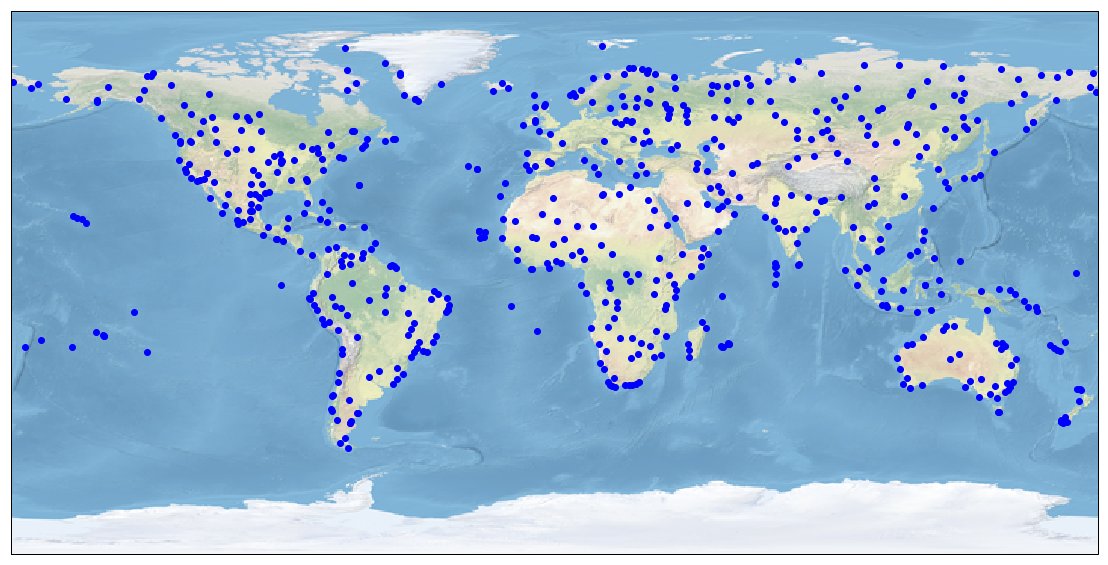

In [8]:
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize = (20,10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.stock_img()
plt.scatter(list(new_df['Longitude']),
           list(new_df['Latitude']),
           color= 'blue', marker='o', 
           transform= ccrs.Geodetic(),
           )
plt.savefig("Distribution.png")
plt.show()

In [9]:
#Export City Data to CSV File
new_df.to_csv("City_Data.csv")

## Latitude vs. Temperature

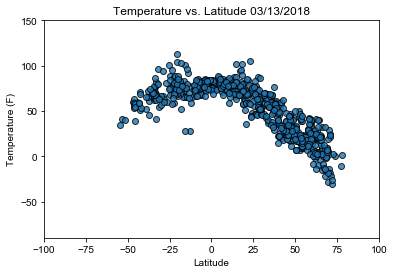

In [10]:
#Build a scatter plot for Latitude vs. Temperature (date unsure if this is what is wanted)

import time
date = time.strftime("%m/%d/%Y")

plt.scatter(new_df['Latitude'],new_df['Temperature'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)
plt.title(f"Temperature vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('seaborn')
plt.ylim(-90, 150)
plt.xlim(-100, 100)
plt.savefig("Temperature.png")
plt.show()

## Latitude vs. Humidity 

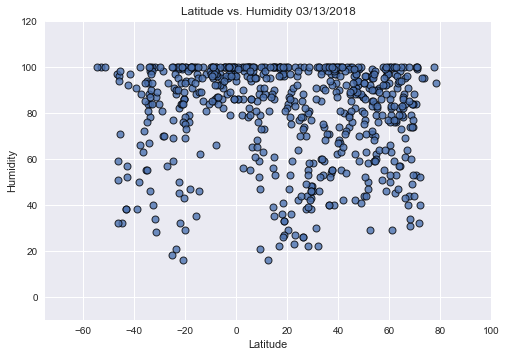

In [11]:
#Build a scatter plot for Latitude vs. Humidity (%)
import time
date = time.strftime("%m/%d/%Y")

plt.scatter(new_df['Latitude'],new_df['Humidity'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)
plt.title(f"Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.style.use('seaborn')
plt.ylim(-10, 120)
plt.xlim(-75, 100)
plt.savefig("Humidity.png")
plt.show()

## Latitude vs. Cloudiness

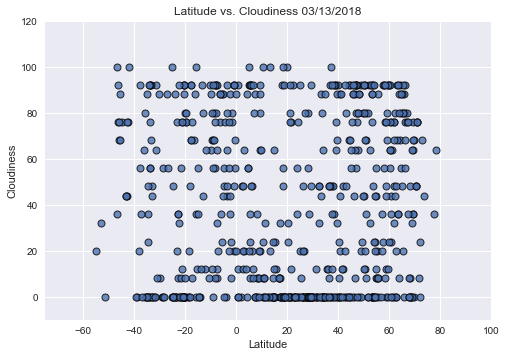

In [12]:
#Build a scatter plot for Latitude vs. Cloudiness (%)
import time
date = time.strftime("%m/%d/%Y")

plt.scatter(new_df['Latitude'],new_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)
plt.title(f"Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.style.use('seaborn')
plt.ylim(-10, 120)
plt.xlim(-75, 100)
plt.savefig("Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed

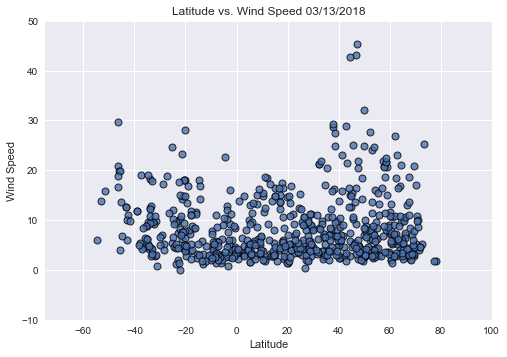

In [13]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)
import time
date = time.strftime("%m/%d/%Y")

plt.scatter(new_df['Latitude'],new_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)
plt.title(f"Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.style.use('seaborn')
plt.ylim(-10, 50)
plt.xlim(-75, 100)
plt.savefig("WindSpeed.png")
plt.show()